# Logistic Regression

**Instructions:**
* go through the notebook and complete the **tasks** .  
* Make sure you understand the examples given
* When a question allows a free-form answer (e.g., ``what do you observe?``) create a new markdown cell below and answer the question in the notebook.
* ** Save your notebooks when you are done **

We are loading the IRIS dataset below to use with logistic regression this time

In [ ]:
%matplotlib inline


from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


iris = datasets.load_iris()

#view a description of the dataset (uncomment next line to do so)
print(iris.DESCR)

#Set X equal to features, Y equal to the targets

X=iris.data 
y=iris.target 
np.random.seed(42)


#we add some random noise to our data to make the task more challenging
X=X+np.random.normal(0,0.4,X.shape)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**Task:** Apply logistic regression with gradient descent using log loss on this dataset.  
- To do so, you need to use the SGDClassifier from scikit learn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).  
- You can  use a log loss, and a constant learning rate so that the penalty parameters can be tuned individually
- If you need to scale the data, can use functions in sklearn.preprocessing such as https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- You are given a fixed test set as seen below.  You can use scikit-learn's GridSearchCV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to validate different parameters using the training set (automatically splitted into validation).  For example, you can experiment with penalty being l1 or l2, and alpha =[0.0001, 0.001, 0.01, 0.1, 1,0]
- When you find the best parameters, you can use the scikit-learn functions 'classification report' and 'confusion matrix' to obtain detailed results (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5, random_state=42)



scaler = StandardScaler()
scaler.fit(X_train)  #fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

from sklearn.linear_model import SGDClassifier
#alpha = regularization when learning rate is constant=eta0
model = SGDClassifier(loss='log_loss', penalty='l2', learning_rate='constant',eta0=0.001,alpha=0.1)
model.fit(X_train, y_train)

print(f"Logistic regression training set classification score: {format(model.score(X_train, y_train), '.4f')} ")
print(f"Logistic regression testing set classification score: {format(model.score(X_test, y_test), '.4f')} ")

print(classification_report(y_test,model.predict(X_test)))

Logistic regression training set classification score: 0.8000 
Logistic regression testing set classification score: 0.8800 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.94      0.65      0.77        23
           2       0.73      0.96      0.83        23

    accuracy                           0.88        75
   macro avg       0.89      0.87      0.87        75
weighted avg       0.90      0.88      0.88        75



In [ ]:
tuned_parameters = [{'penalty': ['l1','l2'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1,0]}]
clf = GridSearchCV(model, tuned_parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(f"Logistic regression training set classification score: {format(clf.score(X_train, y_train), '.4f')} ")
print(f"Logistic regression testing set classification score: {format(clf.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,clf.predict(X_test)))

{'alpha': 0.1, 'penalty': 'l1'}
Logistic regression training set classification score: 0.8000 
Logistic regression testing set classification score: 0.9200 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.74      0.85        23
           2       0.79      1.00      0.88        23

    accuracy                           0.92        75
   macro avg       0.93      0.91      0.91        75
weighted avg       0.94      0.92      0.92        75

[[29  0  0]
 [ 0 17  6]
 [ 0  0 23]]


In [ ]:
model.predict_proba(X_test[0].reshape((1,-1)))

array([[0.26542307, 0.38824075, 0.34633618]])

In [ ]:
print(X_test[0].shape, X_test[0].reshape((1,-1)).shape)

(4,) (1, 4)


**Task:** Assume now that you should:
- Transform this problem into a binary one-vs-rest classification problem, where the positive class is only class 2, 
- Further assume you are using only one feature, say again feature 2.  
- Use the same test/train split as above
- Find a good parametrization for logistic regression on this setting - you can again use ``GridSearchCV``
- Evaluate using ``classification_report`` and `` confusion_matrix`` as above
- Create a graph that plots probability on the y axis, and the input feature on the x axis. You can use ``np.linspace`` to obtain samples in the range of the used feature, and then can use ``model.predict.proba`` to get a list of the probabilities for class 1 or 0.

In [ ]:
#convert to binary classification problem 
yb = (y == 2).astype(int)  # 1 if class == 0 then ok else 0

In [ ]:
yb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#one class, one feature

feat=2

X_train,X_test,y_train,y_test=train_test_split(X,yb,test_size=0.5, stratify=y,random_state=42)



scaler = StandardScaler()
scaler.fit(X_train)  #fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data


#alpha = regularization when learning rate is constant=eta0
model = SGDClassifier(loss='log_loss', penalty='l2', learning_rate='constant',eta0=0.1,alpha=0.1)
model.fit(X_train[:,[feat]], y_train)

print(f"Logistic regression training set classification score: {format(model.score(X_train[:,[feat]], y_train), '.4f')} ")
print(f"Logistic regression testing set classification score: {format(model.score(X_test[:,[feat]], y_test), '.4f')} ")

Logistic regression training set classification score: 0.8400 
Logistic regression testing set classification score: 0.8800 


In [ ]:
tuned_parameters = [{'penalty': ['l1','l2'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1,0]}]
clf = GridSearchCV(model, tuned_parameters)
clf.fit(X_train[:,[feat]], y_train)
print(clf.best_params_)
print(f"Logistic regression training set classification score: {format(clf.score(X_train[:,[feat]], y_train), '.4f')} ")
print(f"Logistic regression testing set classification score: {format(clf.score(X_test[:,[feat]], y_test), '.4f')} ")
print(classification_report(y_test,clf.predict(X_test[:,[feat]])))
print(confusion_matrix(y_test,clf.predict(X_test[:,[feat]])))

{'alpha': 0.01, 'penalty': 'l1'}
Logistic regression training set classification score: 0.8533 
Logistic regression testing set classification score: 0.8933 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        50
           1       0.87      0.80      0.83        25

    accuracy                           0.89        75
   macro avg       0.89      0.87      0.88        75
weighted avg       0.89      0.89      0.89        75

[[47  3]
 [ 5 20]]


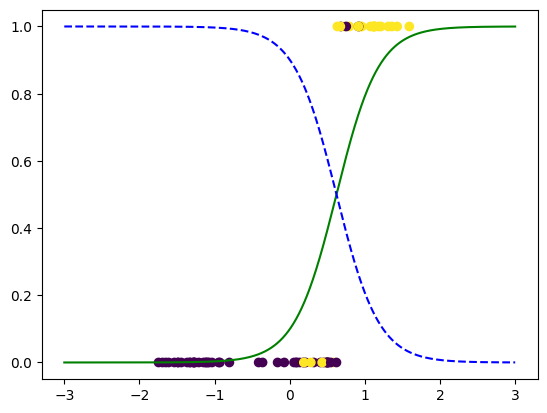

In [ ]:
featureval = np.linspace(-3, 3, 1000).reshape(-1, 1)
y_prob = clf.predict_proba(featureval)
plt.plot(featureval, y_prob[:, 1], "g-", label="+")
plt.plot(featureval, y_prob[:, 0], "b--", label="-")
plt.scatter(X_test[:,[feat]], clf.predict(X_test[:,[feat]]),c=y_test)

In [ ]:
# with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X_train)
model = SGDClassifier(loss='log_loss', penalty='l2', learning_rate='constant',eta0=0.1,alpha=0.1)
tuned_parameters = [{'penalty': ['l1','l2'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1,0]}]
clf = GridSearchCV(model, tuned_parameters)
clf.fit(pca.transform(X_train), y_train)
print(clf.best_params_)
print(f"Logistic regression training set classification score: {format(clf.score(pca.transform(X_train), y_train), '.4f')} ")
print(f"Logistic regression testing set classification score: {format(clf.score(pca.transform(X_test), y_test), '.4f')} ")
print(classification_report(y_test,clf.predict(pca.transform(X_test))))
print(confusion_matrix(y_test,clf.predict(pca.transform(X_test))))


{'alpha': 0.0001, 'penalty': 'l1'}
Logistic regression training set classification score: 0.8267 
Logistic regression testing set classification score: 0.8800 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        50
           1       0.86      0.76      0.81        25

    accuracy                           0.88        75
   macro avg       0.88      0.85      0.86        75
weighted avg       0.88      0.88      0.88        75

[[47  3]
 [ 6 19]]


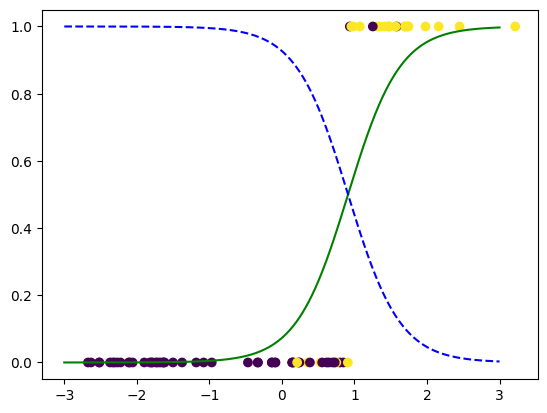

In [ ]:
featureval = np.linspace(-3, 3, 1000).reshape(-1, 1)
y_prob = clf.predict_proba(featureval)
plt.plot(featureval, y_prob[:, 1], "g-", label="+")
plt.plot(featureval, y_prob[:, 0], "b--", label="-")
plt.scatter(pca.transform(X_test), clf.predict(pca.transform(X_test)),c=y_test)

**Task:**: Assume now that you should:
- Use the same transformation as above to convert the problem to a binary one-vs-the-rest classification problem
- The setting is precisely the same as above, only this time include two features from the data, say 1 and 2.
- Use the same test/train split as above
- Find a good parametrization for logistic regression on this setting - you can again use ``GridSearchCV``
- Evaluate using ``classification_report`` and `` confusion_matrix`` as above
- Once you are done, a code cell is given below that should be adapted to plot your decision boundary as a heatmap

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,yb,test_size=0.5, random_state=42)



scaler = StandardScaler()
scaler.fit(X_train)  #fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

from sklearn.linear_model import SGDClassifier
#alpha = regularization when learning rate is constant=eta0
model = SGDClassifier(loss='log_loss', penalty='l2', learning_rate='constant',eta0=0.1,alpha=1)
model.fit(X_train[:,[1,2]], y_train)

print(f"Logistic regression training set classification score: {format(model.score(X_train[:,[1,2]], y_train), '.4f')} ")
print(f"Logistic regression testing set classification score: {format(model.score(X_test[:,[1,2]], y_test), '.4f')} ")

print(classification_report(y_test,model.predict(X_test[:,[1,2]])))

Logistic regression training set classification score: 0.6267 
Logistic regression testing set classification score: 0.7067 
              precision    recall  f1-score   support

           0       0.70      1.00      0.83        52
           1       1.00      0.04      0.08        23

    accuracy                           0.71        75
   macro avg       0.85      0.52      0.45        75
weighted avg       0.79      0.71      0.60        75



In [ ]:
tuned_parameters = [{'penalty': ['l1','l2'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1,0]}]
clf = GridSearchCV(model, tuned_parameters)
clf.fit(X_train[:,[1,2]], y_train)
print(clf.best_params_)
print(f"Logistic regression training set classification score: {format(clf.score(X_train[:,[1,2]], y_train), '.4f')} ")
print(f"Logistic regression testing set classification score: {format(clf.score(X_test[:,[1,2]], y_test), '.4f')} ")
print(classification_report(y_test,clf.predict(X_test[:,[1,2]])))
print(confusion_matrix(y_test,clf.predict(X_test[:,[1,2]])))

{'alpha': 0.01, 'penalty': 'l2'}
Logistic regression training set classification score: 0.8933 
Logistic regression testing set classification score: 0.8533 
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        52
           1       0.80      0.70      0.74        23

    accuracy                           0.85        75
   macro avg       0.84      0.81      0.82        75
weighted avg       0.85      0.85      0.85        75

[[48  4]
 [ 7 16]]


[None, (-5.0, 5.0), (-5.0, 5.0), Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

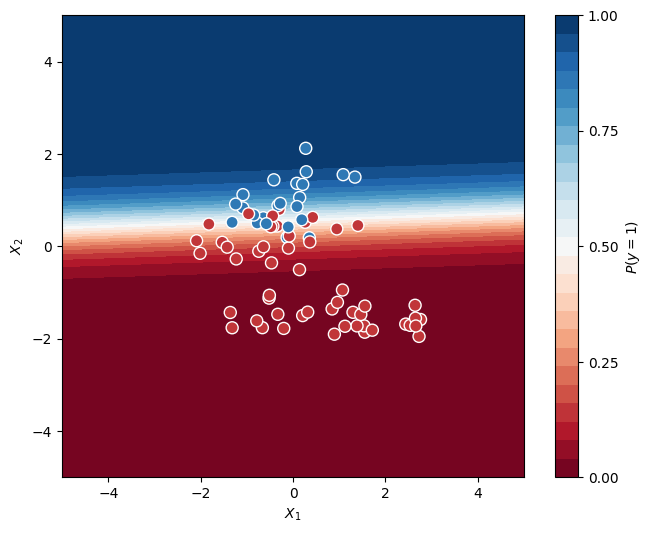

In [ ]:
model=clf

#code to print decision boundary as heatmap- you don't have to worry much about this
#grid is chosen between -5 and 5 
#your logistic regression model should be stored in the variable model
#X_test and y_test should be your testing set - or adapted accordingly 

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:,1], X_test[:, 2], c=y_test[:], s=75,    
           cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)


ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [ ]:
#with PCA
# with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # this should actually be a hyperparameter
pca.fit(X_train)
model = SGDClassifier(loss='log_loss', penalty='l2', learning_rate='constant',eta0=0.1,alpha=0.1)
tuned_parameters = [{'penalty': ['l1','l2'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1,0]}]
clf = GridSearchCV(model, tuned_parameters)
clf.fit(pca.transform(X_train), y_train)
print(clf.best_params_)
print(f"Logistic regression training set classification score: {format(clf.score(pca.transform(X_train), y_train), '.4f')} ")
print(f"Logistic regression testing set classification score: {format(clf.score(pca.transform(X_test), y_test), '.4f')} ")
print(classification_report(y_test,clf.predict(pca.transform(X_test))))
print(confusion_matrix(y_test,clf.predict(pca.transform(X_test))))



{'alpha': 0.001, 'penalty': 'l2'}
Logistic regression training set classification score: 0.7867 
Logistic regression testing set classification score: 0.9467 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.91      0.91      0.91        23

    accuracy                           0.95        75
   macro avg       0.94      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75

[[50  2]
 [ 2 21]]


[None, (-5.0, 5.0), (-5.0, 5.0), Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

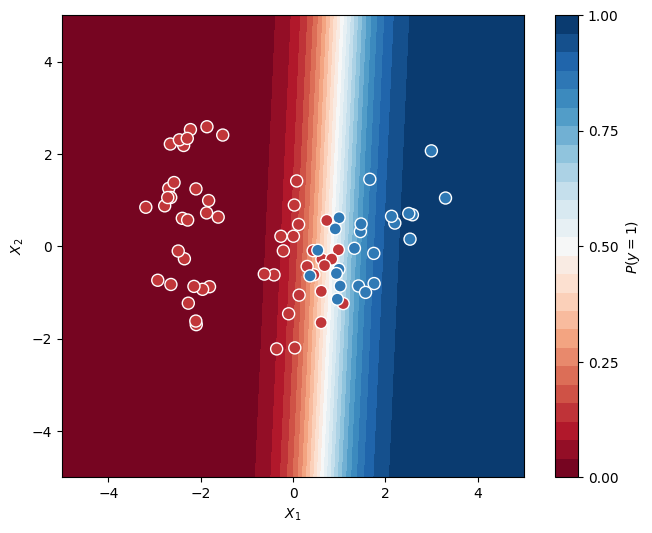

In [ ]:
model=clf
#code to print decision boundary as heatmap- you don't have to worry much about this
#grid is chosen between -5 and 5 
#your logistic regression model should be stored in the variable model
#X_test and y_test should be your testing set - or adapted accordingly 

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(pca.transform(X_test)[:,0], pca.transform(X_test)[:, 1], c=y_test[:], s=75,           cmap="RdBu", vmin=-.2, vmax=1.2,edgecolor="white", linewidth=1)


ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

** Task: ** Repeat the two tasks above in the cells below, but instead of selecting one or two features, use PCA (``sklearn.decomposition.PCA``) to reduce the dimensionality to 1 and 2 respectively. 